<a href="https://colab.research.google.com/github/yasu-kawabe/data_proc/blob/main/%E3%82%AB%E3%82%AE%E6%8E%9B%E3%81%91%E6%97%A5%E3%81%AE%E6%8E%A8%E5%AE%9A%EF%BC%88%E7%B5%B1%E5%90%88%E7%89%88%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Matplotlibでの日本語表示を可能にする
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=d91864131b56b17dc761b47aeeddcc53df0167db612bbf5a2e321f8747883f30
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


-----------
特徴量
file name    output_data
days    21
percent    90.0%
count    28.000000
mean      7.178571
std       3.878273
min       2.000000
25%       4.000000
50%       6.500000
75%      11.000000
max      16.000000
Name: 日, dtype: float64
-----------
信頼区間
(5.674733960532508, 8.682408896610351)


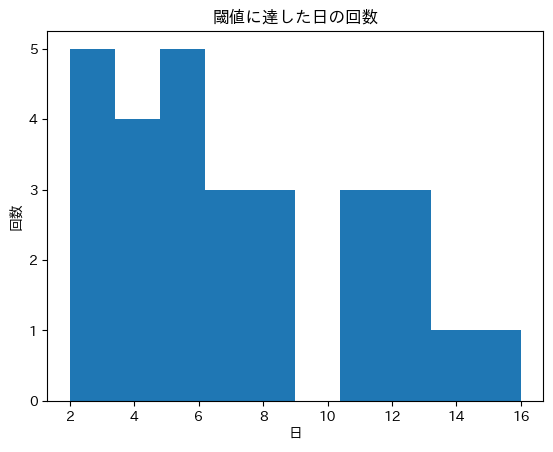

In [ ]:
#ライブラリーの読み込み
import numpy as np
import pandas as pd
import os
import glob
from ast import increment_lineno
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
from scipy import stats

#変数の定義
#処理期間の最終日
date_end = 21
#処理に仕様する閾値
threshold_value = 0.9

#データファイルを収めるフォルダー
folder_name = "/content/"
#データを収めるファイル
file_name = "data"

#データファイルの読み込み
def import_data(folder_name, file_name):
  file_path = folder_name
  #file_pathにfile_nameを加えた文字列を利用してデータファイルの読み込み
  file_list = glob.glob(os.path.join(file_path, file_name + "*"))
  #データファイル名順にソート
  file_list.sort()
  
  #出力する入力データのデータフレームを定義
  input_data_return = pd.DataFrame()

  for file_path in file_list:
    #データファイルをinput_data_tempとして読み込む
    input_data_temp = pd.read_csv(file_path)
    #input_data_tempの内容をinput_data_returnに連結
    input_data_return = pd.concat([input_data_return, input_data_temp], ignore_index = True)
  return input_data_return

#データの日数と閾値を指定し、累積の割合が上限に達する日を決定
def cal_threshold_date(input_data, date_end, threshold_value):
  #最終日を最終列に変換
  column_end = date_end +1
  #出力する処理後データセットを定義。この時、input_dataのcopyであることを明示的に指定
  output_data_return = input_data.iloc[:, 0:column_end].copy()
  
  #データセットの各行の合計値を計算
  output_data_return["合計"] = output_data_return.iloc[:, 1:column_end].sum(axis=1)
  #データセットの各行で合計値に閾値をかけた値を計算
  output_data_return["閾値"] = output_data_return["合計"] * threshold_value

  
  #上限に達した日を記載する行「日」を定義
  output_data_return["日"] = 0
  
  for i in range(len(output_data_return)):
    #累積値を保存する変数を定義
    cum_sum = 0
    
    for j in range(1, column_end):
      #各行において、1日分ずつデータを累積させる
      cum_sum += output_data_return.iloc[i, j]
      #データの累積値が「閾値」の値より大きいかを確認
      if cum_sum > output_data_return.loc[i, "閾値"]:
        #大きければその日は閾値を超えてしまっているので、その前日（j-1）を「日」に保存
        output_data_return.loc[i, "日"] = j - 1
        break
  return output_data_return

#特徴量を出力
def cal_attributes(output_data, date_end, threshold_value):
  print("-----------\n特徴量")
  print("file name    output_data")
  print("days    " + str(date_end))
  print("percent    " + str(threshold_value * 100) + "%")
  print(output_data["日"].describe())

#ヒストグラムを表示
def show_hist(output_data):
  plt.hist(output_data["日"])
  plt.title("閾値に達した日の回数", fontsize=12)
  plt.xlabel("日", fontsize=10) 
  plt.ylabel("回数", fontsize=10)  


#信頼区間を計算
def cal_ci(output_data):
  c = 0.95 #信頼水準。ここでは 95%。
  d = len(output_data["日"])-1 #自由度 (= サンプルサイズ-1)
  m = output_data["日"].mean() #標本平均
  s = stats.sem(output_data["日"]) #標準誤差。不偏分散から計算。
  
  print("-----------\n信頼区間")
  print(stats.t.interval(confidence = c, df = d, loc = m, scale =s))

#処理の実行
#データを読み込み
input_data = import_data(folder_name, file_name)
#データの処理
output_data = cal_threshold_date(input_data, date_end, threshold_value)
#処理後の出力の保存
output_data.to_csv("output_data.csv")
#特徴量計算の計算
cal_attributes(output_data, date_end, threshold_value)
#信頼区間を計算
cal_ci(output_data)
#ヒストグラムを表示
show_hist(output_data)

In [ ]:
output_data

,story_id,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,合計,閾値,日
0,35198223,26000,23633,6932,5352,5546,2502,1802,2344,698,...,154,97,98,78,61,92,64,76233,68609.7,5
1,35198297,1608,859,123,77,93,23,57,73,53,...,45,13,20,9,6,12,11,3208,2887.2,7
2,35197978,898,322,81,42,11,3,19,9,6,...,5,2,1,5,0,3,5,1437,1293.3,2
3,35198108,388,105,61,84,15,3,30,15,4,...,30,5,55,20,2,2,6,836,752.4,16
4,35197692,456,196,85,177,624,359,195,157,40,...,4,8,2,3,5,11,4,2377,2139.3,7
5,35198357,314,474,235,36,172,85,63,44,47,...,21,8,9,3,1,9,10,1598,1438.2,8
6,35198262,434,89,24,33,29,15,2,4,3,...,3,0,2,7,1,1,0,650,585.0,4
7,35198290,1587,723,169,120,122,100,122,93,34,...,10,5,1,0,7,11,7,3153,2837.7,6
8,35197722,918,354,165,127,49,11,18,21,7,...,6,7,4,4,12,2,10,1738,1564.2,4
9,35198224,222,137,22,21,78,108,48,16,8,...,12,29,6,4,4,2,5,742,667.8,11


In [ ]:
# output_data["日"]が正規分布かを判断するためシャピロ–ウィルク検定を実行。p値が0.05より大きければ、帰無仮説（与えられたデータが正規分布に従う）が棄却されず、対数正規分布に従うことが示唆
stat, p = stats.shapiro(output_data["日"])

# p値の出力
print("p-value: ", p)

p-value:  0.09050295501947403


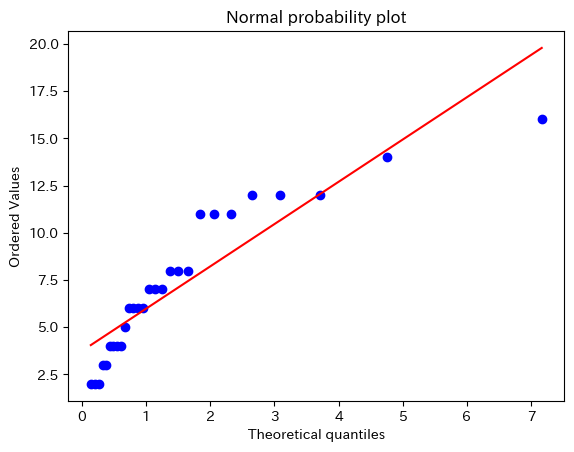

In [ ]:
# output_data["日"]が対数正規分布かを判断するため、正規確率プロットの作成
stats.probplot(output_data["日"], dist=stats.lognorm(1, loc=0, scale=1), plot=plt)

plt.title("Normal probability plot")
plt.show()

In [ ]:
from scipy.stats import lognorm

mean = 4.615385
std = 3.311518
s = np.sqrt(std)

lower_percentile = 2.5
upper_percentile = 97.5

lower_bound = lognorm.ppf(lower_percentile / 100, s, loc=0, scale=mean)
upper_bound = lognorm.ppf(upper_percentile / 100, s, loc=0, scale=mean)

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)


Lower bound:  0.13038492815532823
Upper bound:  163.37608188001659
